# Ecuacion de Poisson sobre un semicirculo

In [9]:
from dolfin import *

from mshr import *

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.tri as tri

CPU times: user 23.2 ms, sys: 11.5 ms, total: 34.7 ms
Wall time: 31.5 ms


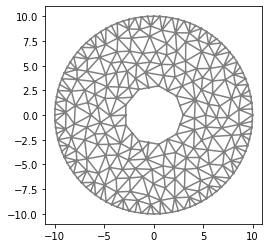

In [10]:
%%time
Rad = 10
Ri = 3.
num_seg = 100

domain = Circle(Point(0., 0.), Rad, num_seg)

# Semidisco
#domain = (domain - Rectangle(Point(-Rad, -Rad), Point(Rad, 0.)) - Circle(Point(0., 0.), Ri))

# Disco
domain = (domain - Circle(Point(0., 0.), Ri))

mesh_res = 10
mesh = generate_mesh(domain, mesh_res)

plot(mesh)

In [11]:
# Definimos espacios funcionales
function_space = FunctionSpace(mesh, 'Lagrange', 1)

In [12]:
# Definimos funciones trial y test
u = TrialFunction(function_space)
v = TestFunction(function_space)

In [13]:
# Definimos condiciones de borde
def outer_boundary(x, on_boundary):
    x,y = x[0], x[1]
    return on_boundary and near(np.sqrt(x**2 + y**2), Rad, 5e-2)

def inner_boundary(x, on_boundary):
    return on_boundary and near(np.sqrt(x**2 + y**2), Ri, 5e-2)

In [14]:
# Inicializamos las condiciones de borde
outer_bc = DirichletBC(function_space, Constant(0), outer_boundary)
bottom_bc = DirichletBC(function_space, Constant(0), inner_boundary)

boundaries = [outer_bc, bottom_bc]

In [15]:
%%time
# Definimos las partes del problema variacional
left_integrand = inner(nabla_grad(u), nabla_grad(v)) * dx

#f =  Expression("x[0]*x[0] + x[1]*x[1]", degree=1)
def f(u):
    #u0 = u.sub(0)
    #u1 = u.sub(1)
    #return Expression(("x[1] + u1 ? 1/(x[0]+u0) : 2./(x[0]+u0) ","x[1] + u1 ? 2./(x[1]+u1)"),u0=u.sub(0),u1=u.sub(1))
    #return Expression(norm(u))
    #return Expression(('1/z'),z=u)
    return 1 + u**2

CPU times: user 129 µs, sys: 59 µs, total: 188 µs
Wall time: 191 µs


In [16]:
right_integrand = f(u)*v*dx

In [17]:
solution = Function(function_space)

In [20]:
%%time
solve(left_integrand == right_integrand, solution, boundaries)

  Calling FFC just-in-time (JIT) compiler, this may take some time.


ArityMismatch: Applying nonlinear operator Power to expression depending on form argument v_1.